In [1]:
import pandas as pd
import numpy as np
import talib as ta
from backtester import *
import matplotlib.pyplot as plt

import ffn

%matplotlib inline

In [2]:
df = pd.read_csv('SMI.csv', index_col='Date', parse_dates=True)
pvalues = pd.read_csv('pvalues.csv', index_col='id')
df.head()

,ABBN.SW,ADEN.SW,ALC.SW,BAER.SW,CFR.SW,CSGN.SW,GEBN.SW,GIVN.SW,LHN.SW,LONN.SW,...,NOVN.SW,ROG.SW,SCMN.SW,SGSN.SW,SIKA.SW,SLHN.SW,SREN.SW,UBSG.SW,UHR.SW,ZURN.SW
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,20.250000,58.500000,NaN,36.204800,35.540001,49.025299,183.399994,834.0,77.571404,71.787399,...,48.662800,180.699997,398.600006,1374.0,27.5833,135.800003,51.099998,16.500000,267.600006,230.000000
2010-01-05,20.350000,60.299999,NaN,35.755501,35.720001,49.483101,185.800003,826.5,77.047600,71.833801,...,47.823002,178.300003,398.899994,1365.0,27.8333,139.500000,52.000000,16.639999,270.600006,235.000000
2010-01-06,20.500000,61.200001,NaN,35.384201,35.970001,48.613300,185.000000,843.5,78.333298,70.814796,...,47.912300,179.500000,396.000000,1355.0,28.0000,139.199997,52.849998,16.530001,272.000000,234.100006
2010-01-07,20.770000,63.000000,NaN,34.973900,36.270000,50.535900,184.399994,847.0,78.476196,71.648499,...,47.557800,178.000000,393.700012,1362.0,27.9167,145.199997,52.299999,16.580000,277.399994,230.899994
2010-01-08,21.049999,63.099998,NaN,35.325600,36.470001,51.314098,185.300003,863.0,78.380997,73.130600,...,47.557800,178.500000,392.799988,1371.0,27.7500,144.699997,52.950001,17.209999,281.000000,232.399994


In [3]:
pvalues

,S1,S2,Pvalue
id,,,
0,ABBN.SW,BAER.SW,0.017347
1,LHN.SW,UHR.SW,0.022313
2,CSGN.SW,SREN.SW,0.027206
3,ABBN.SW,ADEN.SW,0.043189
4,CSGN.SW,SGSN.SW,0.044775
5,CSGN.SW,GEBN.SW,0.047689
6,LHN.SW,LONN.SW,0.047915
7,CSGN.SW,UHR.SW,0.048760


In [4]:
stock1 = 'ABBN.SW'
stock2 = 'BAER.SW'

entry = 2
exit = 0

p_mavg = 15
p_stdev = 15
p_rsi = 15
rsi_thres = 15

42 trades were made
backtest finished


C:\Users\jango\Anaconda3\envs\research\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


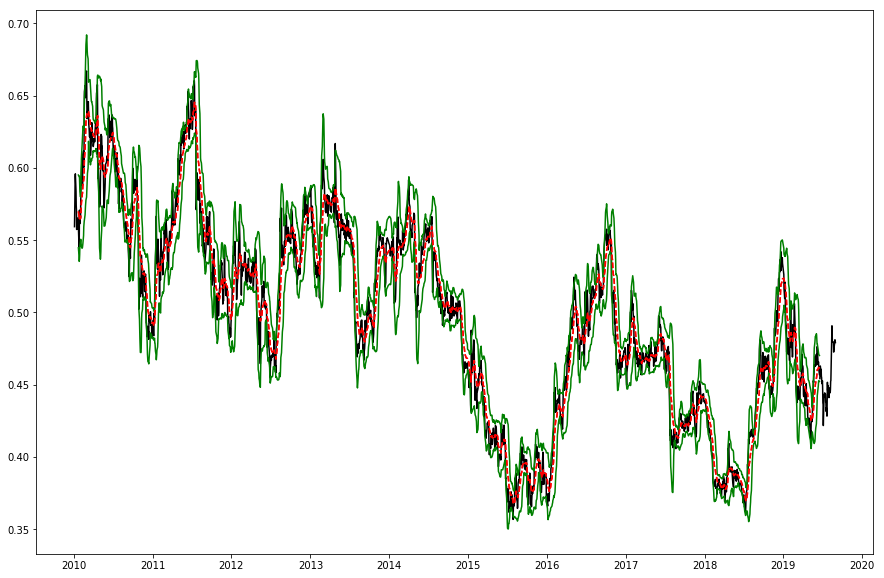

In [5]:
tmp = backtest(pt_signal(df, stock1, stock2, entry, exit, p_mavg, p_stdev, p_rsi, rsi_thres), stock1, stock2)
ret = tmp.cum_returns
plot_signal(tmp)

C:\Users\jango\Anaconda3\envs\research\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


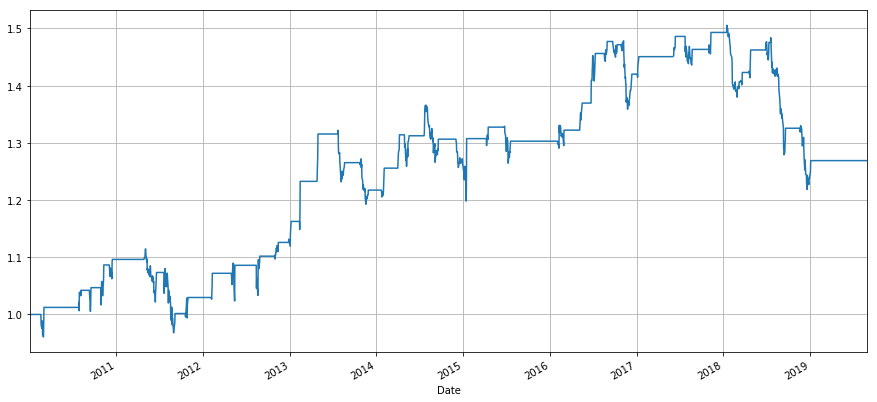

In [6]:
ret.iloc[0] = 1
ret.plot(figsize=(15,7),grid=True)

In [7]:
perf = ret.calc_stats() 
perf.display()

Stats for cum_returns from 2010-01-04 00:00:00 - 2019-08-30 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
26.89%              0.32  2.50%   -19.06%

Annualized Returns:
mtd    3m     6m     ytd    1y      3y      5y      10y    incep.
-----  -----  -----  -----  ------  ------  ------  -----  --------
0.00%  0.00%  0.00%  2.79%  -6.06%  -4.94%  -0.45%  2.50%  2.50%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  0.32     0.33       0.23
mean    2.88%    2.86%      1.99%
vol     9.05%    8.62%      8.63%
skew    2.06     -0.23      -1.67
kurt    27.79    1.65       2.70
best    6.90%    6.87%      9.90%
worst   -3.72%   -7.75%     -17.31%

Drawdowns:
max      avg       # days
-------  ------  --------
-19.06%  -4.06%       113

Misc:
---------------  ------
avg. up month    2.44%
avg. down month  -1.03%
up year %        77.78%
12m up %   

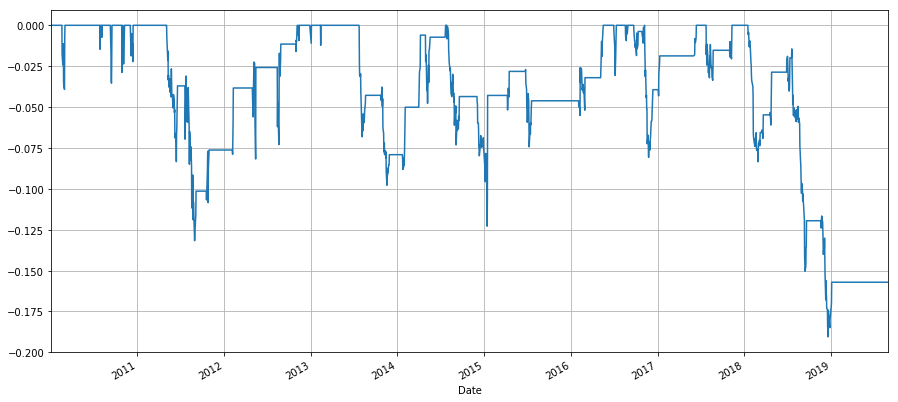

In [8]:
ffn.to_drawdown_series(ret).plot(figsize=(15,7),grid=True) 

In [42]:
current_quarter = df.index[0]

for index, row in df['2017'].iterrows():
    if index < current_quarter and current_quarter.isoweekday() in range(1, 6):
        pass
    else:
        current_quarter = (index + pd.offsets.QuarterEnd() - pd.DateOffset(1))
        if current_quarter.isoweekday() in range(6, 7):
            current_quarter = (current_quarter - pd.DateOffset(1))
    if index == current_quarter:
        print(index)
        print('----------------------------')

2017-03-30 00:00:00
----------------------------
2017-06-29 00:00:00
----------------------------
2017-09-29 00:00:00
----------------------------
2017-12-29 00:00:00
----------------------------


In [43]:
current_quarter = df.index[0]

for index, row in df['2017'].iterrows():
    if index < current_quarter and current_quarter.isoweekday() in range(1, 6):
        pass
    else:
        current_quarter = (index + pd.offsets.QuarterEnd() - pd.DateOffset(1))
        if current_quarter.isoweekday() in range(6, 7):
            current_quarter = (current_quarter - pd.DateOffset(1))
    
    if index == current_quarter:
        next_quarter = ((index + pd.DateOffset(5))+ pd.offsets.QuarterEnd())
        pairs = find_cointegrated_pairs(df[:index])
        for pair in pairs:
            print(pair)
        print(index)
        print(pairs)
        print('----------------------------')

NameError: name 'find_cointegrated_pairs' is not defined